# LAB 1b - ANNDA

In [1]:
import lab1b
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Fitting gaussian clusters

### Define architecture and learning params

In [2]:
# Define Network Architecture
arch = [
    2, # Input dimensionality
    7, # Nodes per hidden layer
    1  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.005
n_epochs = 400

In [3]:

# Create Neural Network object
nn = lab1b.NeuralNetwork(arch, lab1b.activation_fn, lab1b.activation_fn_der, momentum, alpha, lr, n_epochs)

### Define patterns and labels

In [4]:
# Define number of samples
N = 100

In [5]:
mean_A1, mean_A2, cov_A = (-1,0.3), (1,0.3), [[0.2**2, 0], [0, 0.2**2]]
mean_B, cov_B = (0,-0.1), [[0.3**2, 0], [0, 0.3**2]]
X_A, X_B = lab1b.gen_data_clusters(N,mean_A1,mean_A2,cov_A,mean_B,cov_B)


### Random 25% from each class

In [6]:
# Subsample and mix the data
f_A, f_B = 0.75, 0.75
T_train, X_train, T_valid, X_valid = lab1b.subsample_mix_classes(X_A,X_B,f_A,f_B)

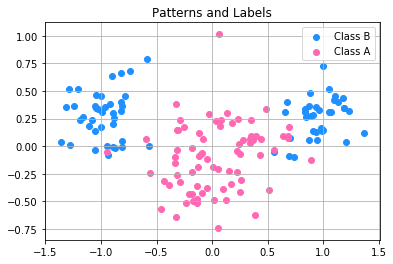

In [7]:
# Plot the patterns and labels
lab1b.plot_data(X_train,T_train)

In [8]:
# Initialize weights matrices
nn.initialize_weights()

In [9]:
# Load training data
nn.training_data(X_train,T_train)

In [10]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 75, Fails = 0, Accuracy = 100.0%
Class B. Hits = 0, Fails = 75, Accuracy = 0.0%
Hits = 75, Fails = 75, Accuracy = 50.0%


In [11]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid)

ValueError: operands could not be broadcast together with shapes (1,50) (150,) 

In [ ]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 74, Fails = 1, Accuracy = 98.667%
Class B. Hits = 74, Fails = 1, Accuracy = 98.667%
Hits = 148, Fails = 2, Accuracy = 98.667%


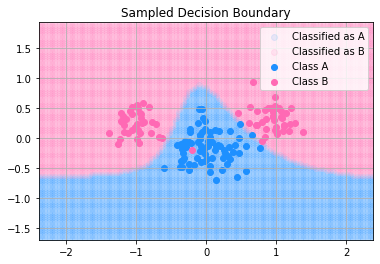

In [ ]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = nn.decision_boundary(X_train,K,L)
lab1b.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)

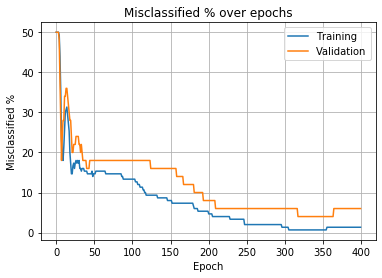

In [ ]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')

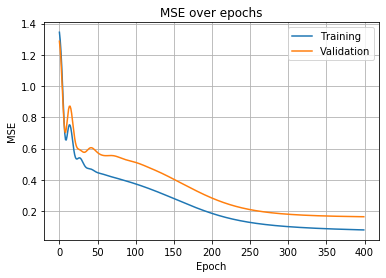

In [ ]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

### 20% from negative x subset of A and 80% positive x subset of A

In [ ]:
# Subsample and mix the data
f_A, f_B, f_posneg = 1, 1, 0.2
T_train, X_train, T_valid, X_valid = lab1b.subsample_mix_classes_complex(X_A,X_B,f_A,f_B,f_posneg)

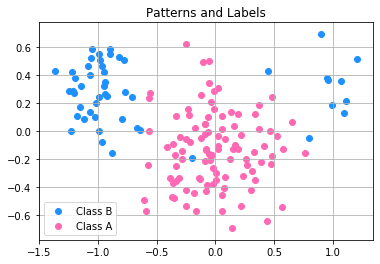

In [ ]:
# Plot the patterns and labels
lab1b.plot_data(X_train,T_train)

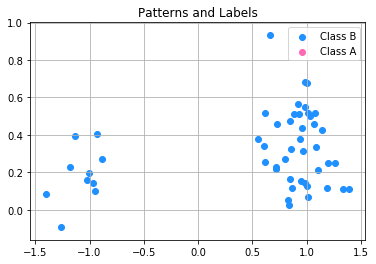

In [ ]:
# Plot the patterns and labels
lab1b.plot_data(X_valid,T_valid)

In [ ]:
# Initialize weights matrices
nn.initialize_weights()

In [ ]:
# Load training data
nn.training_data(X_train,T_train)


In [ ]:
T_guessed,accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)


Class A. Hits = 8, Fails = 92, Accuracy = 8.0%
Class B. Hits = 41, Fails = 9, Accuracy = 82.0%
Hits = 49, Fails = 101, Accuracy = 32.667%


In [ ]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid)


/home/alejp1998/Development/ANN/lab1/lab1b.py:127: RuntimeWarning: invalid value encountered in long_scalars
  accuracy_neg = round(hits_neg*100/np.shape(T_neg)[0],3)


In [ ]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 100, Fails = 0, Accuracy = 100.0%
Class B. Hits = 38, Fails = 12, Accuracy = 76.0%
Hits = 138, Fails = 12, Accuracy = 92.0%


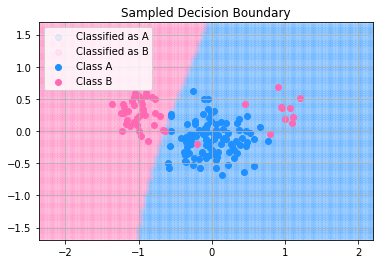

In [ ]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = nn.decision_boundary(X_train,K,L)
lab1b.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)


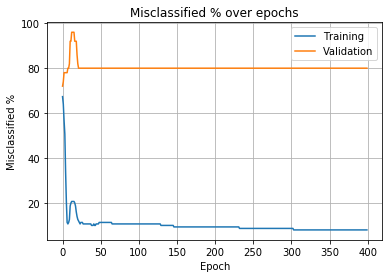

In [ ]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')


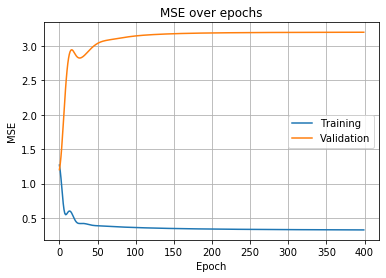

In [ ]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

## Encoder problem

### Define architecture and learning params

In [ ]:
# Define Network Architecture
arch = [
    8, # Input dimensionality
    2, # Nodes per hidden layer
    8  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.1
n_epochs = 5000

In [ ]:

# Create Neural Network object
nn = lab1b.NeuralNetwork(arch, lab1b.activation_fn, lab1b.activation_fn_der, momentum, alpha, lr, n_epochs)

### Generate data

In [ ]:
X_train = np.eye(8)*2 - 1
T_train = X_train
X_valid = X_train
T_valid = T_train

### Train network

In [ ]:
# Initialize weights matrices
nn.initialize_weights()


In [ ]:
# Load training data
nn.training_data(X_train,T_train)


In [ ]:
T_guessed, accuracy = nn.classify_matrix(X_train,T_train,True)


Hits = 0, Fails = 8, Accuracy = 0.0%


In [ ]:

epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid,matrix=True)

In [ ]:
T_guessed, accuracy = nn.classify_matrix(X_train,T_train,True)

Hits = 7, Fails = 1, Accuracy = 87.5%


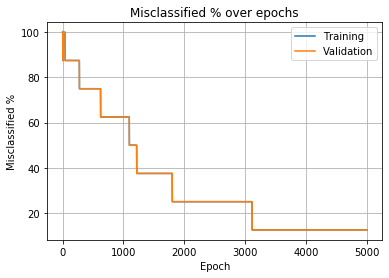

In [ ]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')


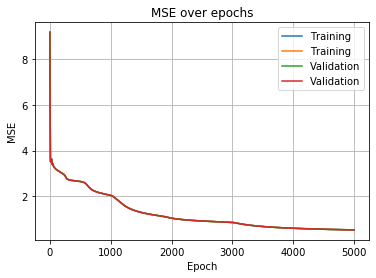

In [ ]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

In [ ]:
# Vectorize activation function
i = 1
X_i = np.array([X_train[:,i]]).T
O_i = nn.forward_pass(X_i)
vfunc = np.vectorize(lab1b.activation_fn)
vfunc(nn.forward_mem[0])



array([[ 0.9987641 ],
       [-0.40583151]])

## Function approximation


### Define architecture and learning params


In [17]:
# Define Network Architecture
arch = [
    2, # Input dimensionality
    12, # Nodes per hidden layer
    1  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.05
n_epochs = 200


In [18]:
# Create Neural Network object
nn = lab1b.NeuralNetwork(arch, lab1b.activation_fn, lab1b.activation_fn_der, momentum, alpha, lr, n_epochs)

### Generate data

In [19]:
N = 500
feat_range = [-5,5]
variance = 10 
bias = -0.5
noise_variance = 0.05
X,T,X_grid,Y_grid,Z_grid = lab1b.generate_func_approx_data(N,feat_range,variance,bias,noise_variance=noise_variance)

Text(0.5, 0.92, '2D function to be approximated')

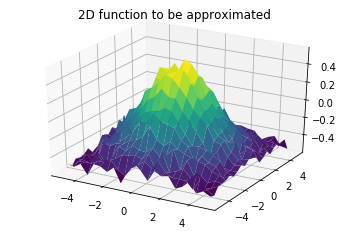

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D function to be approximated')

In [21]:
# Subsample function data
f = 0.75
X_train, T_train, X_valid, T_valid = lab1b.subsample_function_data(X,T,f)

### Train network

In [22]:
# Initialize weights matrices
nn.initialize_weights()

In [23]:

# Load training data
nn.training_data(X_train,T_train)

In [24]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid,matrix=False)

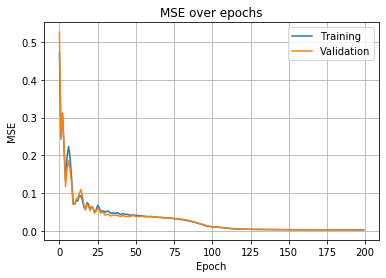

In [26]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')


In [27]:
# Generate data for plot
Z_grid_guessed = np.reshape(nn.forward_pass(X),(int(np.sqrt(N)),int(np.sqrt(N))))
Z_grid_error = Z_grid_guessed - Z_grid

Text(0.5, 0.92, '2D function approx.')

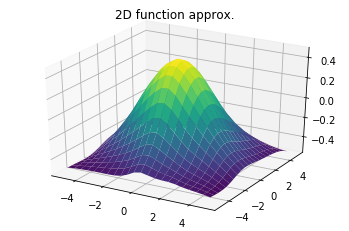

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid_guessed, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D function approx.')

Text(0.5, 0.92, '2D approx. error')

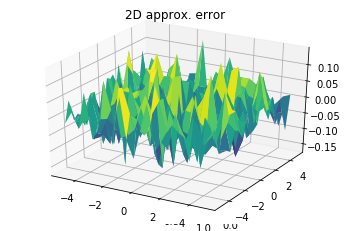

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid_error, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D approx. error')

In [30]:
mse_overall = (f*epoch_mses[-1] +  (1-f)*epoch_mses_valid[-1])[0]